# Author - Akash Dasgupta

## Dataset - Instacart

### The Dataset Overview - 

Instacart is a same-day delivery and pick up service that allows consumers to shop through the company’s mobile app or website from selected grocery stores, such as Trader Joe’s, Costco and Fairway.

The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, the dataset provides between 4 and 100 of their orders, with the sequence of products purchased in each order. The dataset also provides the week and hour of day the order was placed and relative measure of time between orders.

So let's start by importing the dependencies.
#### NOTE  - : The Order product Dataframe is the train dataset which we will be using for training.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the data-frame
aisles = pd.read_csv(r'/content/sample_data/aisles.csv')
department = pd.read_csv(r'/content/sample_data/departments.csv')
order_products = pd.read_csv(r'/content/sample_data/order_products_train.csv')
orders = pd.read_csv(r'/content/sample_data/orders.csv')
products = pd.read_csv(r'/content/sample_data/products.csv')

In [5]:
# Quick-over-view
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
department.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2.0,8.0,NaN
1,2398795,1,prior,2,3.0,7.0,15.0
2,473747,1,prior,3,3.0,12.0,21.0
3,2254736,1,prior,4,4.0,7.0,29.0
4,431534,1,prior,5,4.0,15.0,28.0


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
#Check the null-values in each set of data
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
department.isnull().sum()

department_id    0
department       0
dtype: int64

In [12]:
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [13]:
orders.isnull().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     1
order_hour_of_day             1
days_since_prior_order    16516
dtype: int64

In [14]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Hence, above following code shows that there's no null values. Hurray!

In [15]:
# Let's make the data informative by using info() method to each of the CSV File
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [17]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [18]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273062 entries, 0 to 273061
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                273062 non-null  int64  
 1   user_id                 273062 non-null  int64  
 2   eval_set                273062 non-null  object 
 3   order_number            273062 non-null  int64  
 4   order_dow               273061 non-null  float64
 5   order_hour_of_day       273061 non-null  float64
 6   days_since_prior_order  256546 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 14.6+ MB


In [20]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Hence, we are lucky enough to get all non-null values and will segregate the columns now
Will now Merge Products and Departments on Common Department id.

From the code below we will look deep into the orders dataframe thathow eval set is used for training, testing and prior.
We know that the dataset has 4 to 100 orders of a customer are given and here we need to predict the products that are re-ordered.
The column eval_set tells us that which category the order belongs to from the three sub-datasets (prior, train and test).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


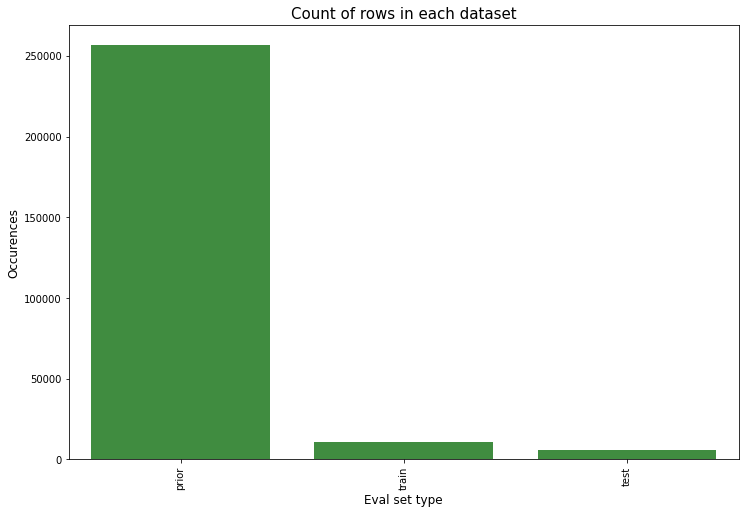

In [21]:
cnt = orders.eval_set.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt.index, cnt.values, alpha=0.8, color='g')
plt.ylabel('Occurences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
def unique_count(x):
    return len(np.unique(x))
cnt_srs = orders.groupby('eval_set')["user_id"].aggregate(unique_count)
cnt_srs

eval_set
prior    16515
test      5956
train    10558
Name: user_id, dtype: int64

Here we can see that there are 206209 customers in total out of which Train contains 131209 and Test contains 75000. Let's Explore more by Analysis now!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


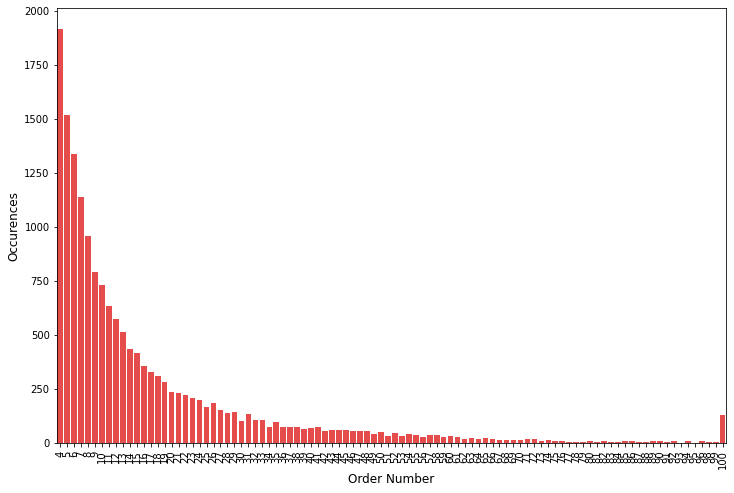

In [23]:
cnt_srs = orders.groupby('user_id')["order_number"].aggregate(np.max).reset_index() # Order number is the name, we pass the name in such paramets
cnt_srs= cnt_srs.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='r')
plt.ylabel('Occurences', fontsize=12)
plt.xlabel('Order Number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


Hence through the graph we can see that the minimum orders starts from 4 and ends to 100.

Let's take a look how ordering changes in week.

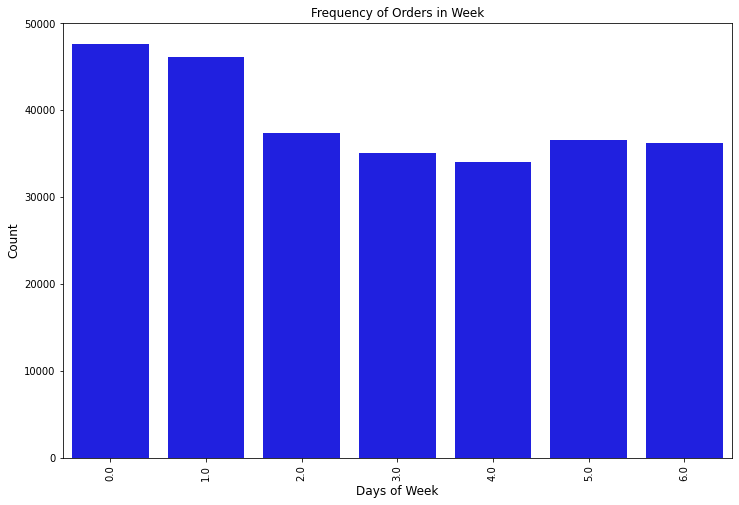

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders, color='blue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Orders in Week')
plt.show()


Seems 0 and 1 are the Weekends as the orders are high as compared to others.

Now let's explore how it changes with the times of the day

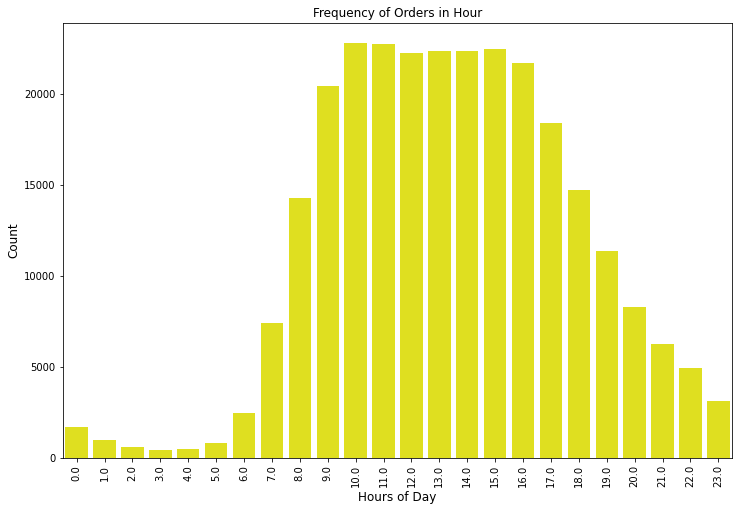

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders, color='yellow')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hours of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Orders in Hour')
plt.show()

Here we can explore that the orders went on increasing from morning 7am to and was on high till 8pm as this time the customers were active online.

Now we will combine both to see the distribution. The Order for 24 x 7 days are shown below we can see 0th day 3pm to 4 pm was the max ordered.

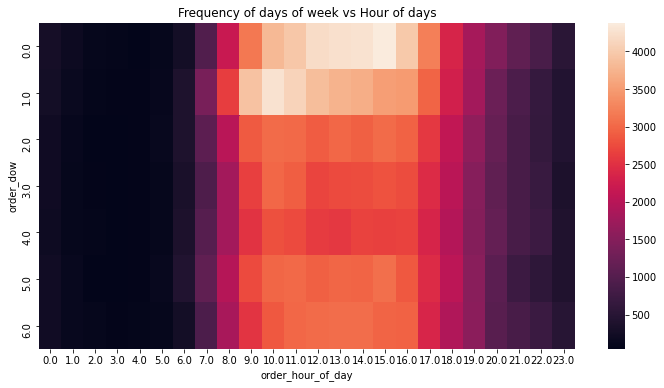

In [26]:
grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped = grouped.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped)
plt.title('Frequency of days of week vs Hour of days')
plt.show()

We will check the time intervals between the orders now.

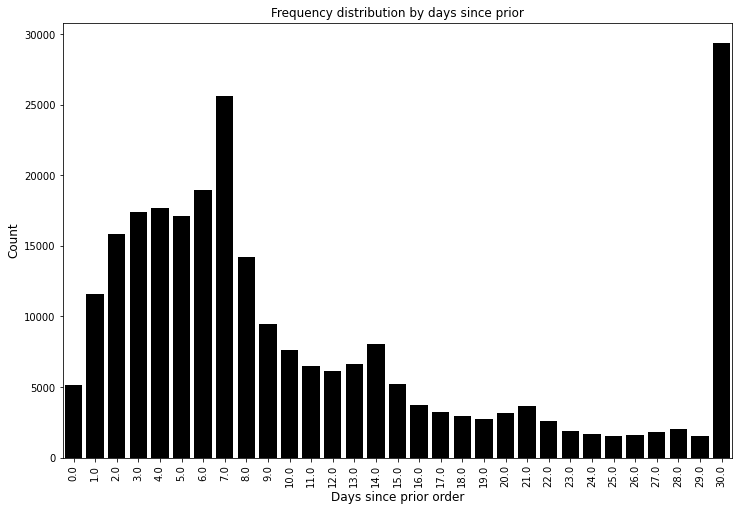

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders, color='k')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency distribution by days since prior')
plt.show()

By the above graph we can see that on 7th day and 30th day ordser were placed the most. The smaller peaks on 14 to 29 indicates that the order placed were less on those respective days.

Our aim is to get the re-order and check out the re-order percentage.

In [28]:
order_products.reordered.sum()/order_products.shape[0]

0.5985944127509629

Hence on average its like 60% of people re-ordered.
There is also a situation where none of the products are reordered let's check it.

In [29]:
 order_products.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [30]:
grouped = order_products.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped['reordered'].iloc[grouped['reordered']>1] = 1
grouped.reordered.value_counts()/ grouped.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

By this we can see that 93% were reordered and rest 6.5% were not reorderd.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


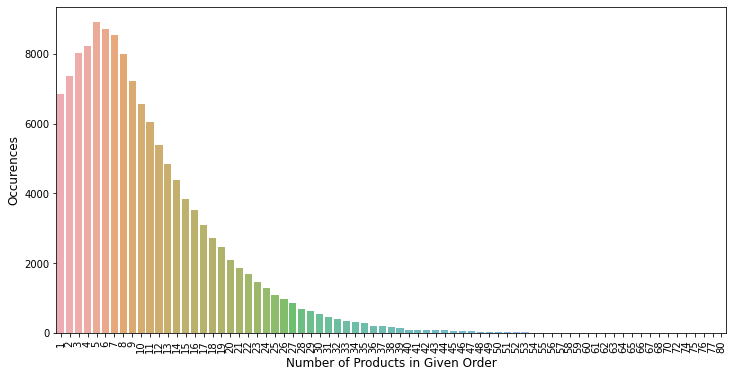

In [31]:
grouped = order_products.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
grouped = grouped.add_to_cart_order.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(grouped.index, grouped.values, alpha=0.8)
plt.ylabel('Occurences', fontsize=12)
plt.xlabel('Number of Products in Given Order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
data = pd.merge(order_products, products)
data.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1384612,3420011,1528,12,0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,Stevia Sweetener,97,13
1384616,3420895,38900,9,1,Plain Golden Toasted Bread Crumbs,5,13


In [66]:
data = pd.merge(data, aisles, on= 'aisle_id')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt


In [67]:
data = pd.merge(data, department, on= 'department_id')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [68]:
data.isnull().sum()
# No null values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
aisle                0
department           0
dtype: int64

Let's Check the frequency count on the product name

In [69]:
count = data['product_name'].value_counts().reset_index().head(20)
count.columns = ['product_name','frequebcy_count']
count

,product_name,frequebcy_count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


By the above chart we can see how much count is present for each product, hence bana has the most and red onion the least.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


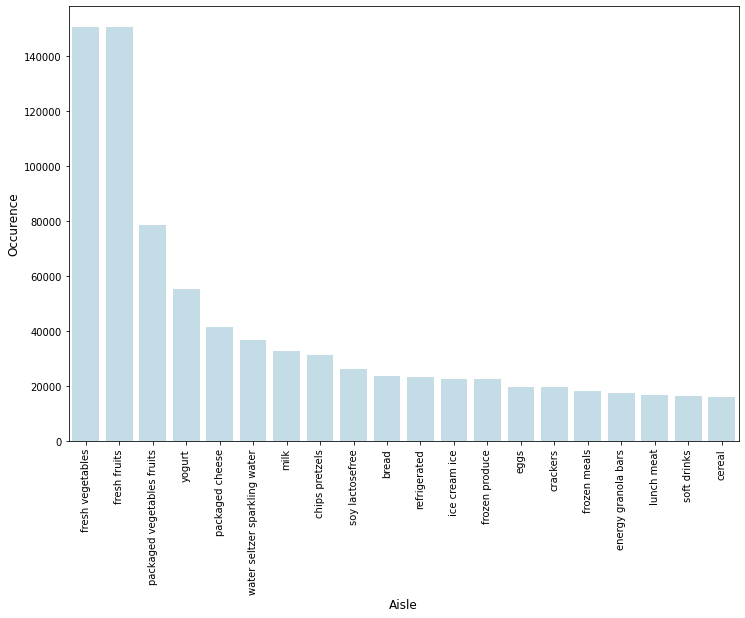

In [70]:
count= data['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha =0.8, color = 'lightblue')
plt.ylabel('Occurence', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

By the graph above we can see that how many occurence of items are present on the data which we have just created by merging.
Most order Aisle's are fresh fruits and fresh vegetables.

Now let's create a pie chart for the department level distribution

##### Department Chart

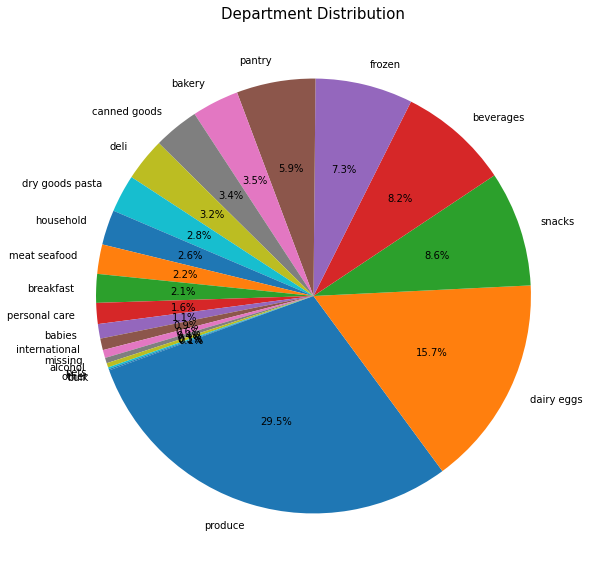

In [71]:
plt.figure(figsize=(10,10))
series = data['department'].value_counts()
labels = (np.array(series.index))
size = (np.array((series/series.sum())*100))
plt.pie(size,labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Department Distribution', fontsize=15)
plt.show()

### RFM Modelling (Recency, Frequency and Monetary)

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?
Frequency – How often do they purchase?
Monetary Value – How much do they spend?
Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10.

![Incontent_image.png](https://drive.google.com/uc?export=view&id=1TekkkLigNdISwrf-UOuHUB_JHMptGkqp)



# Formulas

## Recency = Latest date - Last Invoice Date

## Frequency = Count of invoice number of transaction(s)

## Monetary = Sum of Total

In [72]:
data = pd.merge(data, orders, on= 'order_id')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0
1,1242203,2295,4,0,Yellow Bell Pepper,83,4,fresh vegetables,produce,2993,train,15,0.0,7.0,7.0
2,1242203,16797,6,1,Strawberries,24,4,fresh fruits,produce,2993,train,15,0.0,7.0,7.0
3,1242203,47626,3,1,Large Lemon,24,4,fresh fruits,produce,2993,train,15,0.0,7.0,7.0
4,1242203,5450,7,1,Small Hass Avocado,24,4,fresh fruits,produce,2993,train,15,0.0,7.0,7.0


In [73]:
index = data.index
index 

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            110873, 110874, 110875, 110876, 110877, 110878, 110879, 110880,
            110881, 110882],
           dtype='int64', length=110883)

In [62]:
data = data[data.index<5999]
data.shape

(6000, 34)

In [77]:
invoice = pd.read_csv(r'/content/sample_data/InvoiceDates.csv')
invoice.head()

,invoicedates
0,21/08/2020
1,23/03/2019
2,25/02/2020
3,4/12/2020
4,3/5/2020


In [78]:
invoice.shape

(60000, 1)

In [80]:
invoice = invoice[invoice.index<5999]
invoice.shape

(5999, 1)

In [88]:
data = pd.merge(data, invoice, left_index=False, right_index= False)
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,invoicedates_x,invoicedates_y,invoicedates
0,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020
1,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020
3,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020
4,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020


In [89]:
Amount = pd.read_csv(r'/content/sample_data/Amount.csv')
Amount.shape

(5999, 1)

In [91]:
data = pd.merge(data, Amount, left_index=True, right_index= True)
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,invoicedates_x,invoicedates_y,invoicedates,Amount
0,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020,468
1,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020,474
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020,860
3,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020,856
4,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,2993,train,15,0.0,7.0,7.0,21/08/2020,21/08/2020,21/08/2020,954


In [92]:
data.shape

(5999, 19)

In [117]:
data['invoicedates'] = pd.to_datetime(data['invoicedates'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5999 non-null   int64         
 1   product_id              5999 non-null   int64         
 2   add_to_cart_order       5999 non-null   int64         
 3   reordered               5999 non-null   int64         
 4   product_name            5999 non-null   object        
 5   aisle_id                5999 non-null   int64         
 6   department_id           5999 non-null   int64         
 7   aisle                   5999 non-null   object        
 8   department              5999 non-null   object        
 9   user_id                 5999 non-null   int64         
 10  eval_set                5999 non-null   object        
 11  order_number            5999 non-null   int64         
 12  order_dow               5999 non-null   float64 

We have completely preprocessed the data and added the Invoice dates column which was a major disadvantage of our dataset provided, Hence now we can create RFM Model. Hence we need to create a RFM model it will unfortunately require the date-time module.

The date time module will help to set a threashold and help us to know that how recently the customer has placed his/her order. So let's get started.

In [124]:
import datetime as dt
# Setting the threashold as latest date at the pont where we are intrested caltulating the RFM

Latest_Date = dt.datetime(2020,12,31).date()
#Latest_Date = Latest_Date.strftime('%d/%m/%Y')
#print(Latest_Date)
data = data.rename(columns={'user_id':'Customer_ID'})
# Creating the modelling

RFM = data.groupby('Customer_ID').agg({'invoicedates': lambda x :(Latest_Date - x.max().date()).days,'order_id': lambda x:len(x), 'Amount': lambda x : x.sum()})

# Converting Invoice Dates to integer time so we can do Mathematical Operations
RFM['invoicedates'] = RFM['invoicedates'].astype(int)

# renaming the columns
RFM.rename(columns = {
    'invoicedates' : 'Recency',
                   'order_id' : 'Frequency',
                     'Amount' : 'Monetary'}, inplace=True)

RFM.reset_index().head()

,Customer_ID,Recency,Frequency,Monetary
0,27,354,10,5229
1,38,523,12,6318
2,63,176,20,10347
3,80,192,8,4030
4,146,683,16,7671


We can see in the output of above code snippet that customer 146 has bought recently 683 products, we can say that there was a discount going arounnd that time.


The Description of RFM is shown below, The statictics data of RFM Modelling.

In [126]:
RFM.describe()

,Recency,Frequency,Monetary
count,261.000000,261.000000,261.000000
mean,354.827586,22.984674,12736.172414
std,208.479839,20.326748,11424.960105
min,9.000000,4.000000,1430.000000
25%,172.000000,11.000000,5681.000000
50%,356.000000,17.000000,8982.000000
75%,523.000000,27.000000,15402.000000
max,729.000000,184.000000,101175.000000


Here we will create the Quantiles as to subdivide the data into 4 groups into 4 groups based on recency, frequency and monetary, We can choose any quantiles values as per the business requirements. 

In [127]:
# Splitting into 4 Quantiles Segments
quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [128]:
quantiles

{'Frequency': {0.25: 11.0, 0.5: 17.0, 0.75: 27.0},
 'Monetary': {0.25: 5681.0, 0.5: 8982.0, 0.75: 15402.0},
 'Recency': {0.25: 172.0, 0.5: 356.0, 0.75: 523.0}}

Now we will create a Funtion to create the R F and M segments

Note -: Low value of R, Better the performance of customer
while for F and M Higher the value, better is the customer. Hence, we can see below has low values for low quantilesin RScore.
For FnM Score low value for Quantiles will have high values. 

In [129]:
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x<= d[p][0.75]:
    return 3
  else : 
    return 4

def FMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1     

Here we are giving the values of R F and M in terms of 1,2,3 and 4 based on their performances and merging them to the dataframe.

In [130]:
RFM['R'] = RFM['Recency'].apply(RScore, args=('Recency', quantiles,))
RFM['F'] = RFM['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
RFM['M'] = RFM['Monetary'].apply(FMScore, args=('Monetary', quantiles,))
RFM.head()

,Recency,Frequency,Monetary,R,F,M
Customer_ID,,,,,,
27,354,10,5229,2,4,4
38,523,12,6318,3,3,3
63,176,20,10347,2,2,2
80,192,8,4030,2,4,4
146,683,16,7671,4,3,3


Here, we are first creating a group of R F and M by combining them together by applying concat function of string.

Secondly, we are adding all R, F and M Score to create a combined score of all these three segments.

In [131]:
# Calculating and adding RFM Group value of combined R F and M
RFM['RFMGroup'] = RFM.R.map(str) + RFM.F.map(str)+ RFM.M.map(str)

# Calculating combined Scores

RFM['RFMScore'] = RFM[['R','F','M']].sum(axis=1)
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
Customer_ID,,,,,,,,
27,354,10,5229,2,4,4,244,10
38,523,12,6318,3,3,3,333,9
63,176,20,10347,2,2,2,222,6
80,192,8,4030,2,4,4,244,10
146,683,16,7671,4,3,3,433,10


We will assign the loyalty level of the customers now using the below condditions.


1.   Best by Platimun
2.   Better by Gold
3.   Good by Silver
4.   Fine by Bronze

The pd.qcut() function has the first args as the dataframe, second is Q cut which  represents the bins with same number of records, for each bin, third is labels which in our case are the above labels.



In [136]:
Loyalty = ['Platinum','Gold','Silver','Bronze']
Scorecut = pd.qcut(RFM.RFMScore, q=4, labels=Loyalty)
RFM['Loyalty'] = Scorecut.values
RFM.reset_index().head()

,Customer_ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty
0,27,354,10,5229,2,4,4,244,10,Silver
1,38,523,12,6318,3,3,3,333,9,Silver
2,63,176,20,10347,2,2,2,222,6,Gold
3,80,192,8,4030,2,4,4,244,10,Silver
4,146,683,16,7671,4,3,3,433,10,Silver


In [137]:
RFM.shape

(261, 9)

**Feature Selection to Apply on the Model**

Here we are selecting the features for x and y which we are going to fit into our model and map the accuracy of our Model.
Model which we are going to use are:

1. K-NN
2. K-Means
3. SVM

Hence, we need to selectthe features and their mappings and convert it into arra, as array well-fit on the models.

In [164]:
x = np.asarray(RFM[['Recency','Frequency','Monetary']])
y = np.asarray(RFM['Loyalty'])

Using the Trqain Test Split to split the data into trqaining set and testing set. Using the Sklearn Library.

In [165]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=4)

In [166]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(208, 3)
(208,)
(53, 3)
(53,)


**K-Nearest Neighbour**

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

![KNN.png](https://drive.google.com/uc?export=view&id=1AFUZAFU48AuZuQG0SvZCex0Gkd6YrOC5)


Firstly, we will choose the number of neighbors, so we will choose the k=5.
Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry.
By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B.
![distance.png](https://drive.google.com/uc?export=view&id=1TNg6gC6EfOrWNgVC-Mn9J7Dl4Aw6UI0_)


**Fitting K-NN classifier to the Training data:**
Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be
n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
metric='minkowski': This is the default parameter and it decides the distance between the points.
p=2: It is equivalent to the standard Euclidean metric.

In [170]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_Classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [176]:
Knnypred = KNN_Classifier.predict(xtest)

**Support Vector Machines**

Support vector machines so called as SVM is a supervised learning algorithm which can be used for classification and regression problems as support vector classification (SVC) and support vector regression (SVR). It is used for smaller dataset as it takes too long to process. In this set, we will be focusing on SVC.
The hyperplane is a function which is used to differentiate between features. In 2-D, the function used to classify between features is a line whereas, the function used to classify the features in a 3-D is called as a plane similarly the function which classifies the point in higher dimension is called as a hyperplane. 
![SVM.png](https://drive.google.com/uc?export=view&id=15eJKaEg_wVrMZ1BUg5D9V1fB5Tjyay5J)




Formula for Support Vector Machinesare being Shown Below -: 
![Formula.png](https://drive.google.com/uc?export=view&id=1wgTGkzEPHosoWoAIBPbzzOQnJdOFg3HT)


In [167]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(xtrain,ytrain)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
ypredict = classifier.predict(xtest)

Evaluation - :

Classification report is already a function in sklearn inside metrics which predicts out theConfusion Matrix the Formulas Confusion Matrix is also shown below -:

![Confusion Matrix.png](https://drive.google.com/uc?export=view&id=1wQFjihkZ7z1rLmWceNu59c9-if9yz_bu)


In [180]:
print("Confusion Matrix For K-Nearest Neighbors")
from sklearn.metrics import classification_report
print(classification_report(ytest, Knnypred))

Confusion Matrix For K-Nearest Neighbors
              precision    recall  f1-score   support

      Bronze       0.75      0.67      0.71         9
        Gold       0.43      0.38      0.40         8
    Platinum       0.88      0.88      0.88        17
      Silver       0.71      0.79      0.75        19

    accuracy                           0.74        53
   macro avg       0.69      0.68      0.68        53
weighted avg       0.73      0.74      0.73        53



In [181]:
print("Confusion Matrix For Support Vector Machines")
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredict))

Confusion Matrix For Support Vector Machines
              precision    recall  f1-score   support

      Bronze       0.89      0.89      0.89         9
        Gold       0.58      0.88      0.70         8
    Platinum       1.00      0.82      0.90        17
      Silver       0.89      0.84      0.86        19

    accuracy                           0.85        53
   macro avg       0.84      0.86      0.84        53
weighted avg       0.88      0.85      0.86        53

